In [1]:
from ycimpute.imputer.mice import MICE # inputation library
import missingno as msno # visualzing missing value
import pandas as pd
import numpy as np
import time

# Multivariate imputation by chained equations (MICE), sometimes called “fully conditional specification” or “sequential regression multiple imputation”.
### args:
### n_nearest_columns: Number of other columns to use to estimate current column.

### assumption of MICE is, given the variables used in the imputation procedure, the missing data are Missing At Random (MAR), which means that the probability that a value is missing depends only on observed values(other variables) and not on unobserved values .


In [2]:
df = pd.read_hdf('../features/base_featurs.h5','base_featurs')
no_need_to_inpute = ['SK_ID_CURR','index']
df.drop(no_need_to_inpute,axis = 1, inplace = True)
# handling with infinity
df.replace([np.inf, -np.inf], np.nan, inplace = True)
print (df.shape)


(356251, 218)


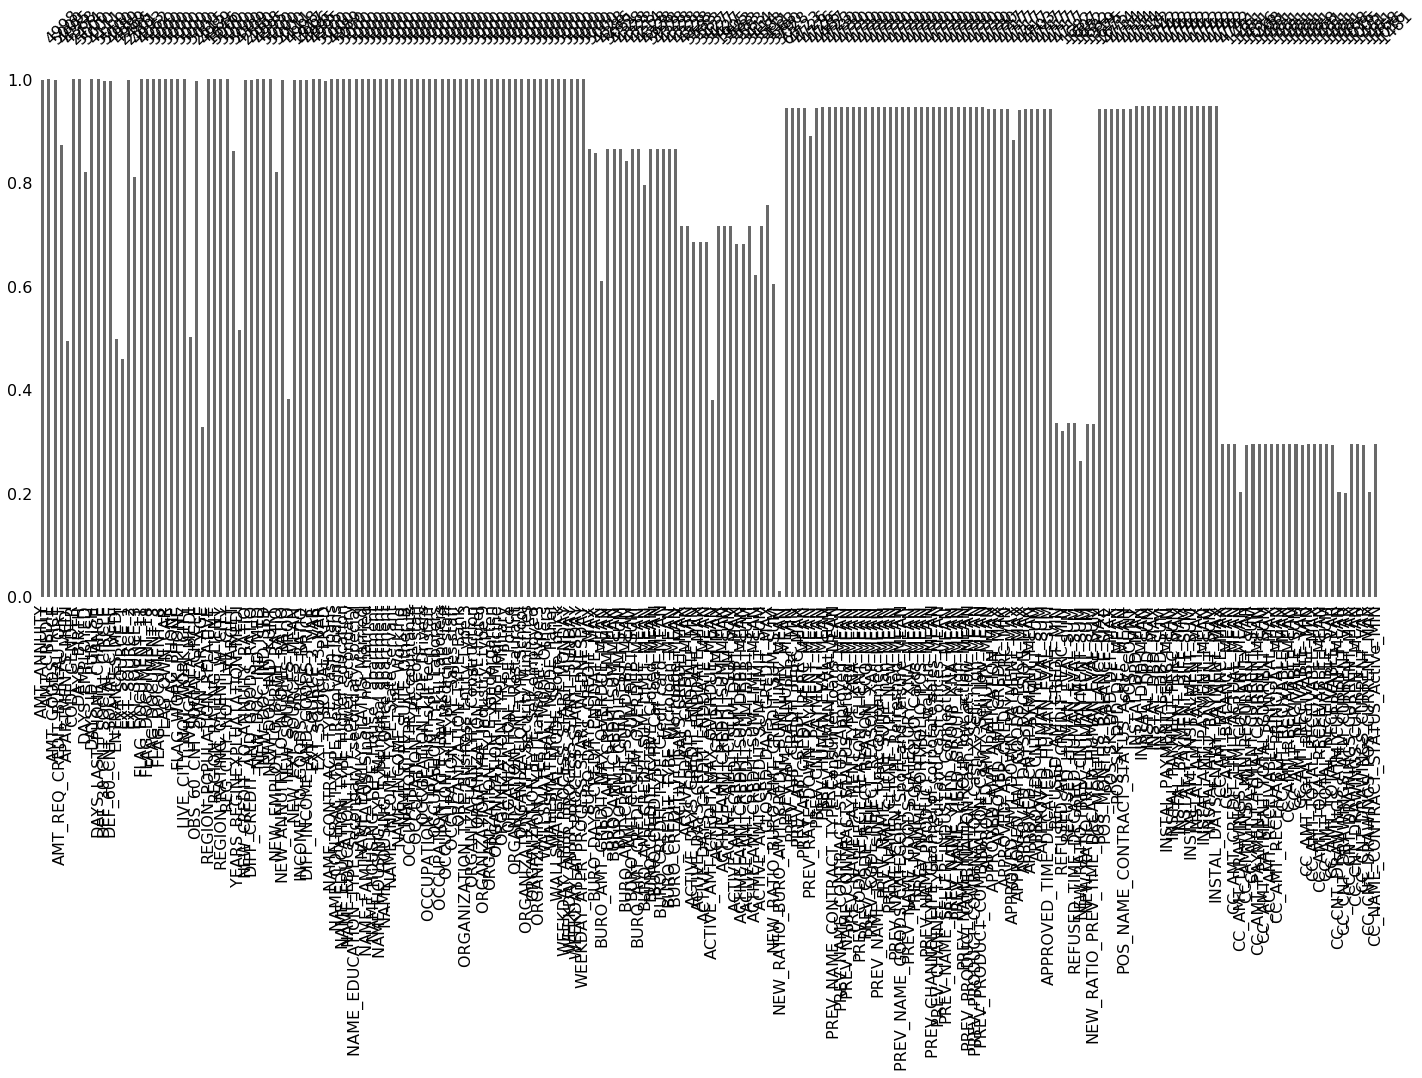

In [3]:
msno.bar(df.sample(5000))

In [4]:

            visit_sequence : str
                Possible values: "monotone" (default), "roman", "arabic",
                    "revmonotone".

IndentationError: unexpected indent (<ipython-input-4-d653eabe8b57>, line 2)

# parameters explorationg of multivariate imputation by chained equation
# n_nearest_columns, 使用全部的最近columns來估計, 和使用ㄧ半的, 對時間上沒什麼差。

In [8]:
df[df.columns.tolist()[: 10]].shape

(356251, 10)

In [31]:
X_missing = df.sample(n = 500).copy()
s = time.time()
X_filled = MICE(n_nearest_columns = df.shape[0] * 0.5,
               ).complete(X_missing.values)
e = time.time()
print (e - s) # for 100 row, 105.09017705917358sec ===> 81.27 小時, 肯定不行, 需要挑columns放進去

420.1490170955658


In [33]:
X_missing = df.sample(n = 500).copy()
s = time.time()
X_filled = MICE(
               ).complete(X_missing.values)
e = time.time()
print (e - s) # for 100 row, 105.09017705917358sec ===> 81.27 小時, 肯定不行, 需要挑columns放進去

410.6421766281128


In [13]:
len(df) / 500 * 410.6421766281128 / 60/ 60

81.2731589255232

In [41]:
X_missing = df.sample(n = 500).copy()
s = time.time()
X_filled = MICE(init_fill_method = 'median').complete(X_missing.values)
e = time.time()
print (e - s) # for 100 row, 105.09017705917358 sec  ===> 81.27 小時, 肯定不行, 需要挑columns放進去

419.7008409500122


In [18]:
X_missing = df[df.columns.tolist()[: 50]].sample(n = 500).copy()
s = time.time()
X_filled = MICE(n_nearest_columns = df.shape[0] * 0.5,
               ).complete(X_missing.values)
e = time.time()
print (e - s) # for 500 row, 1/4 features , 11.8382 secsc ===> 2.3429860 小時, 可以接受

16.03804349899292


In [19]:
len(df) / 500 * 11.83821225166320 / 60/ 60

2.342986084926259

In [20]:
X_missing = df[df.columns.tolist()[: 100]].sample(n = 500).copy()
s = time.time()
X_filled = MICE(n_nearest_columns = df.shape[0] * 0.5,
               ).complete(X_missing.values)
e = time.time()
print (e - s) # for 500 row, 1/2 features , 11.8382 secsc ===> 9.76501508037 小時, 不可以接受

46.36447048187256


In [21]:
len(df) / 500 * 49.33888506889343 / 60/ 60

9.765015080376862

In [ ]:
#

In [32]:
500 / 60

8.333333333333334

In [26]:
105.090177 * df.shape[0] / 100 / 60 /60 

103.99577957340833

In [14]:
para_dict = {}
for impute_type in ['pmm', 'col']:
    # pmm: probablistic moment matching
    # col: posterior predictive distribution
    for init_fill_method in ["mean", "median", "random"]:
        para_dict['impute_type'] = impute_type
        para_dict['init_fill_method'] = init_fill_method
para_dict 

{'impute_type': 'col', 'init_fill_method': 'random'}